In [ ]:
import wikipediaapi

This Wikipedia API is imported. 
This is because a wikipedia website will be used to scrape the data from a table.

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

Import requests allows for the sending and requesting of HTTP. 
Import pandas allows for data analysis and data manipulation.
Import BeautifulSoup allows for the scraping of data from a website

In [3]:
wikiurl="https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


This involves identifying the whether it is legal to scrape the data from the provided website.
The result is printed to check if it is valid
Printing 200 ensures that it is valid

In [4]:
soup = BeautifulSoup(response.text,'html.parser')
olympictable=soup.find('table',{'class':"wikitable"})
print(olympictable)

#Using an html parser to obtain the information presented in the wikipedia table

<table class="wikitable sortable" style="margin-top:0; text-align:center; font-size:90%;">
<tbody><tr>
<th>Team
</th>
<th align="center" colspan="5" style="background-color:#f2f2ce;"><a href="/wiki/Summer_Olympic_Games" title="Summer Olympic Games">Summer Olympic Games</a>
</th>
<th align="center" colspan="5" style="background-color:#cedff2;"><a href="/wiki/Winter_Olympic_Games" title="Winter Olympic Games">Winter Olympic Games</a>
</th>
<th align="center" colspan="5"><a href="/wiki/Olympic_Games" title="Olympic Games">Combined total</a>
</th></tr>
<tr>
<th><style data-mw-deduplicate="TemplateStyles:r1038841319">.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}</style><span class="rt-commentedText tooltip tooltip-dotted" title="International Olympic Committee country code">Team (IOC code)</span>
</th>
<th style="background-color:#f2f2ce; width:2em;">
<p><link href="mw-data:TemplateStyles:r1038841319" rel="mw-deduplicated-inline-style"/><span class="rt-commentedTex

The data is being parsed from the website.
The variable olympictable showcases the result from printing the table in an HTML format. 

In [5]:
userdata = pd.read_html(str(olympictable))
userdata = pd.DataFrame(userdata[0])
userdata

Team  \
    .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Team (IOC code)   
0                                    Afghanistan (AFG)                                       
1                                        Algeria (ALG)                                       
2                                      Argentina (ARG)                                       
3                                        Armenia (ARM)                                       
4                              Australasia (ANZ) [ANZ]                                       
..                                                 ...                                       
152                               Zimbabwe (ZIM) [ZIM]                                       
153           Independent Olympic Athletes (IOA) [IOA]                                       
154       Independent Olympic Participants (IOP) [IOP]                                       
155                             Mixed team (ZZX) [ZZX]                                       
156                                             Totals                                       

    Summer Olympic Games                                        \
                     No. Unnamed: 2_level_1 Unnamed: 3_level_1   
0                     15                  0                  0   
1                     14                  5                  4   
2                     25                 21                 26   
3                      7                  2                  8   
4                      2                  3                  4   
..                   ...                ...                ...   
152                   14                  3                  4   
153                    3                  1                  0   
154                    1                  0                  1   
155                    3                 11                  6   
156                   29               5460               5429   

                                          Winter Olympic Games  \
    Unnamed: 4_level_1 Unnamed: 5_level_1                  No.   
0                    2                  2                    0   
1                    8                 17                    3   
2                   30                 77                   20   
3                    8                 18                    8   
4                    5                 12                    0   
..                 ...                ...                  ...   
152                  1                  8                    1   
153                  1                  2                    0   
154                  2                  3                    0   
155                  8                 25                    0   
156               5892              16781                   24   

                                                              \
    Unnamed: 7_level_1 Unnamed: 8_level_1 Unnamed: 9_level_1   
0                    0                  0                  0   
1                    0                  0                  0   
2                    0                  0                  0   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
152                  0                  0                  0   
153                  0                  0                  0   
154                  0                  0                  0   
155                  0                  0                  0   
156               1171               1169               1160   

                        Combined total                      \
    Unnamed: 10_level_1            No. Unnamed: 12_level_1   
0                     0             15                   0   
1                     0             17                   5   
2                     0             45                  21   
3 

The dataframe userdata is created to ensure that the information in the table belongs to it. 
The dataframe contains strings presenting the information belonging to countries and the tally of medals won

In [6]:
userdata.columns

MultiIndex([(                'Team', ...),
            ('Summer Olympic Games', ...),
            ('Summer Olympic Games', ...),
            ('Summer Olympic Games', ...),
            ('Summer Olympic Games', ...),
            ('Summer Olympic Games', ...),
            ('Winter Olympic Games', ...),
            ('Winter Olympic Games', ...),
            ('Winter Olympic Games', ...),
            ('Winter Olympic Games', ...),
            ('Winter Olympic Games', ...),
            (      'Combined total', ...),
            (      'Combined total', ...),
            (      'Combined total', ...),
            (      'Combined total', ...),
            (      'Combined total', ...)],
           )

The ".columns" function reveals the headers provided to the table from the wikipedia website.
It is printed to identify the names of the titles

In [7]:
len(userdata.columns)

16

The len function is being used to identify the number of items that will be created in the list.

In [8]:
userdata.columns = ["Country","Summer Olympics Ranking","Summer Olympics Gold","Summer Olympics Silver","Summer Olympics Bronze","Summer Olympics Mixed","Winter Olympics Ranking","Winter Olympics Gold","Winter Olympics Silver","Winter Olympics Bronze","Winter Olympics Mixed","Combined Ranking","Combined Gold","Combined Silver","Combined Bronze","Combined Mixed"]

The list of columns is created with appropriate titles to display in the main dataframe.
This makes it convenient to later choose the desired columns to present when creating charts.

In [9]:
def name_fixer(country_name):
    if country_name == None:
        return ""
    country_name = country_name.replace(u'\xa0', u' ')
    position = country_name.find("(")
    
    
    if position != -1:
        return country_name [:position]

This is a function that serves to make the Country name more appealing when viewed in the chart.
Since all of the countries have a code beside the name, a function is created to splice the remainder of the string. 
The function identifies where a parentheses is being located, and replaces it with an empty string.

In [10]:
userdata['Country'] = userdata['Country'].apply(name_fixer)

This applies the above function to all of the values present under the column "Country", which consist of the list of countries.

In [11]:
userdata

,Country,Summer Olympics Ranking,Summer Olympics Gold,Summer Olympics Silver,Summer Olympics Bronze,Summer Olympics Mixed,Winter Olympics Ranking,Winter Olympics Gold,Winter Olympics Silver,Winter Olympics Bronze,Winter Olympics Mixed,Combined Ranking,Combined Gold,Combined Silver,Combined Bronze,Combined Mixed
0,Afghanistan,15,0,0,2,2,0,0,0,0,0,15,0,0,2,2
1,Algeria,14,5,4,8,17,3,0,0,0,0,17,5,4,8,17
2,Argentina,25,21,26,30,77,20,0,0,0,0,45,21,26,30,77
3,Armenia,7,2,8,8,18,8,0,0,0,0,15,2,8,8,18
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Zimbabwe,14,3,4,1,8,1,0,0,0,0,15,3,4,1,8
153,Independent Olympic Athletes,3,1,0,1,2,0,0,0,0,0,3,1,0,1,2
154,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3
155,Mixed team,3,11,6,8,25,0,0,0,0,0,3,11,6,8,25


The main dataframe is being printed to showcase the table with appropriately labelled column names.
The dataframe also showcases the countries being displayed without their country code.

In [12]:
summerdata = userdata[["Country","Summer Olympics Gold"]].copy()
summerdata['Summer Olympics Gold'] = pd.to_numeric(summerdata['Summer Olympics Gold'],errors = 'coerce')
summerdata

,Country,Summer Olympics Gold
0,Afghanistan,0
1,Algeria,5
2,Argentina,21
3,Armenia,2
4,Australasia,3
...,...,...
152,Zimbabwe,3
153,Independent Olympic Athletes,1
154,Independent Olympic Participants,0
155,Mixed team,11


The summerdata dataframe is created by taking columns "Country" and "Summer Olympics Gold" from the userdata dataframe.
The values in the Summer Olympics Gold tally are converted to numerical values before being printed.

In [13]:
winterdata = userdata[["Country","Winter Olympics Gold"]].copy()
winterdata['Winter Olympics Gold'] = pd.to_numeric(winterdata['Winter Olympics Gold'],errors = 'coerce')
winterdata

,Country,Winter Olympics Gold
0,Afghanistan,0
1,Algeria,0
2,Argentina,0
3,Armenia,0
4,Australasia,0
...,...,...
152,Zimbabwe,0
153,Independent Olympic Athletes,0
154,Independent Olympic Participants,0
155,Mixed team,0


The winterdata dataframe is created by taking columns "Country" and "Summer Olympics Gold" from the userdata dataframe.
The values in the Winter Olympics Gold tally are converted to numerical values before being printed.

<AxesSubplot:title={'center':'Top 5 Countries by Summer Olympics Gold Medals'}, xlabel='Country', ylabel='Number of Gold Medals'>

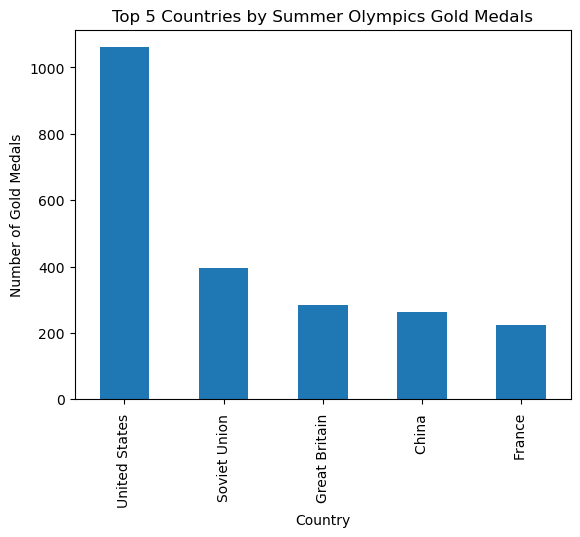

In [15]:
summerdata = summerdata[:-1]
top_5_summer = summerdata.nlargest(5, 'Summer Olympics Gold')
top_5_summer.set_index('Country')['Summer Olympics Gold'].plot(kind='bar', title='Top 5 Countries by Summer Olympics Gold Medals',xlabel = "Country",ylabel = "Number of Gold Medals")

The last row from the summerdata dataframe is deleted because it consisted of the total medals tally, which was interfering with the data being presented in the bar graph.
The "n.largest" function is used to display the five countries with the largest number of gold medals.
The ".plot" function is used to print a bar chart.
The title, xlabel, and ylabel are included as parameters to display the appropriate titles. 

<AxesSubplot:title={'center':'Top 5 Countries by Winter Olympics Gold Medals'}, xlabel='Country', ylabel='Number of Gold Medals'>

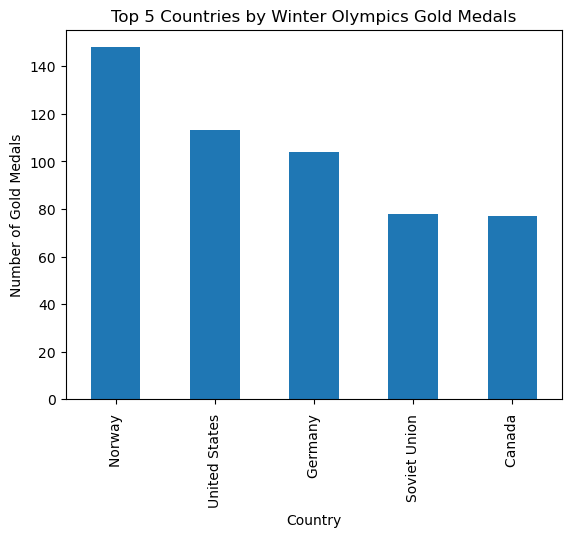

In [16]:
winterdata = winterdata[:-1]
top_5_winter = winterdata.nlargest(5, 'Winter Olympics Gold')
top_5_winter.set_index('Country')['Winter Olympics Gold'].plot(kind='bar', title='Top 5 Countries by Winter Olympics Gold Medals',xlabel = "Country",ylabel = "Number of Gold Medals")

The last row from the winterdata dataframe is deleted because it consisted of the total medals tally, which was interfering with the data being presented in the bar graph.
The "n.largest" function is used to display the five countries with the largest number of gold medals.
The ".plot" function is used to print a bar chart.
The title, xlabel, and ylabel are included as parameters to display the appropriate titles. 

In [17]:
userdata.to_csv('userdata.csv', index=False)
summerdata.to_csv('summerdata.csv', index=False)
winterdata.to_csv('winterdata.csv', index=False)

The ".to_csv" function is being used with the three dataframes to store the values as a csv file. 